In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from scipy.stats import chi2_contingency

In [2]:
# education_great_18 = pd.read_csv('vote05_2022_1.csv')
# education_18_24 = pd.read_csv('vote05_2022_2.csv')
# education_25_44 = pd.read_csv('vote05_2022_3.csv')
# education_45_64 = pd.read_csv('vote05_2022_4.csv')
# education_65_75 = pd.read_csv('vote05_2022_5.csv')
# education_great_75 = pd.read_csv('vote05_2022_6.csv')

# # List of all DataFrames
# dfs = [education_great_18, education_18_24, education_25_44, education_45_64, education_65_75, education_great_75]

# # Ensure all columns with numerical values are converted to numeric (removing commas if necessary)
# for df in dfs:
#     df.iloc[:, 1:] = df.iloc[:, 1:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# # Add the DataFrames together by summing them
# summed_data = dfs[0].copy()  # Start with the first DataFrame as the base
# summed_data.iloc[:, 1:] = sum(df.iloc[:, 1:] for df in dfs)

# # Display the summed DataFrame
# summed_data.head()

# pd.set_option('display.max_rows', None)  # Show all rows
# print(summed_data)



education_great_18 = pd.read_csv('table05_1.csv')
education_18_24 = pd.read_csv('table05_2.csv')
education_25_44 = pd.read_csv('table05_3.csv')
education_45_64 = pd.read_csv('table05_4.csv')
education_65_75 = pd.read_csv('table05_5.csv')
education_great_75 = pd.read_csv('table05_6.csv')

# List of all DataFrames
dfs = [education_great_18, education_18_24, education_25_44, education_45_64, education_65_75, education_great_75]

# Ensure all columns with numerical values are converted to numeric (removing commas if necessary)
for df in dfs:
    df.iloc[:, 1:] = df.iloc[:, 1:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Combine all DataFrames by summing them
combined_data = pd.concat(dfs)

# Group by 'Characteristics' and sum all numerical columns
summed_data = combined_data.groupby('Characteristics', as_index=False).sum()

# Display the summed DataFrame
pd.set_option('display.max_rows', None)  # Show all rows
summed_data.head()


,Characteristics,Total population,Total Citizen Population,Reported registered,Reported not registered,No response to registration1,Reported voted,Reported not voted,No response to voting2,Reported registered percent,Reported voted percent,No response to registration1,No response to voting2,Unnamed: 4,Reported registered percent.1
0,"9th to 12th grade, no diploma",60099,50953,25737,14139,9341,21134,19479,8639,830.4,577.6,1737,1702,166.3,116.3
1,Advanced degree,125367,114851,97873,2889,13998,95283,5545,13933,1374.0,1106.5,90,90,256.4,237.7
2,Bachelor's degree,220386,207047,168896,9093,28107,161247,17135,27752,1392.7,1106.5,954,914,248.0,228.7
3,High school graduate,293315,270157,171205,47320,47584,149826,71074,45474,1082.2,785.8,4050,3783,202.0,167.9
4,Less than 9th grade,34741,19166,8784,6313,3794,7202,8140,3556,468.8,337.5,273,267,141.5,53.5


In [3]:
# Creating the contingency table
contingency_table = df[["Reported voted", "Reported not voted"]].astype(int).values

# Performing the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 2683.922359540041
p-value: 0.0
Degrees of Freedom: 20
Expected Frequencies:
 [[15668.63500898  2837.36499102]
 [  837.36518015   151.63481985]
 [ 1178.57667419   213.42332581]
 [ 5526.27151754  1000.72848246]
 [ 3636.48478135   658.51521865]
 [ 2514.63557639   455.36442361]
 [ 1974.45460072   357.54539928]
 [ 6653.20079437  1204.79920563]
 [  360.68510288    65.31489712]
 [  477.52675592    86.47324408]
 [ 1918.57381013   347.42618987]
 [ 1546.03520623   279.96479377]
 [ 1181.11671012   213.88328988]
 [ 1166.72317315   211.27682685]
 [ 9016.28089326  1632.71910674]
 [  477.52675592    86.47324408]
 [  700.20323962   126.79676038]
 [ 3608.54438605   653.45561395]
 [ 2090.44957512   378.55042488]
 [ 1332.67218762   241.32781238]
 [  806.03807028   145.96192972]]


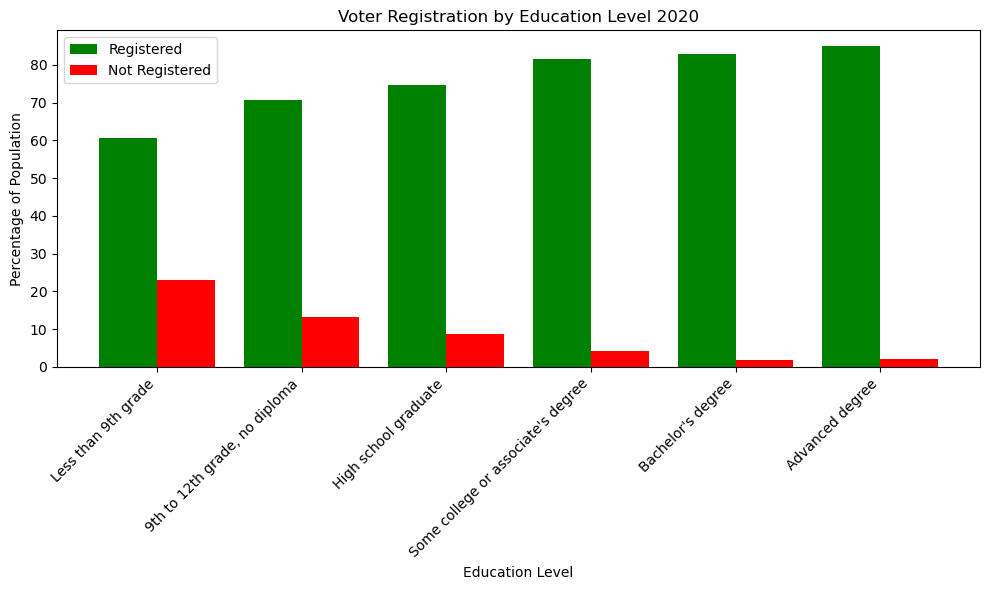

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already created with relevant data

# Calculate percentages
df["Registered Percent"] = (df["Reported registered"] / df["Total Citizen Population"]) * 100
df["Not Registered Percent"] = (df["Reported not registered"] / df["Total Citizen Population"]) * 100

# Specify the desired order of education levels
education_order = [
    "Less than 9th grade", 
    "9th to 12th grade, no diploma", 
    "High school graduate", 
    "Some college or associate's degree", 
    "Bachelor's degree", 
    "Advanced degree"
]

# Filter out the "Total" row and sort by the specified order
df_filtered = df[df["Characteristics"] != "Total"]

# Ensure there are no duplicates and aggregate if necessary
df_filtered = df_filtered.groupby("Characteristics").mean().reset_index()

# Ensure the Characteristics column is categorical with the desired order
df_filtered["Characteristics"] = pd.Categorical(df_filtered["Characteristics"], categories=education_order, ordered=True)
df_filtered = df_filtered.sort_values("Characteristics")

# Visualization: Grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.4  # Narrower bar width for side-by-side bars
index = np.arange(len(df_filtered["Characteristics"]))  # Create an index for groups

# Grouped bars
plt.bar(index - bar_width / 2, df_filtered["Registered Percent"], width=bar_width, label="Registered", color="green")
plt.bar(index + bar_width / 2, df_filtered["Not Registered Percent"], width=bar_width, label="Not Registered", color="red")

# Add labels and title
plt.xticks(index, df_filtered["Characteristics"], rotation=45, ha="right")
plt.ylabel("Percentage of Population")
plt.xlabel("Education Level")
plt.title("Voter Registration by Education Level 2020")
plt.legend()

# Display chart
plt.tight_layout()
plt.show()


In [5]:

# Creating the contingency table
contingency_table = df[["Reported voted", "Reported not voted"]].values

# Performing the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

ValueError: data type <class 'numpy.object_'> not inexact